In [6]:
import matplotlib.pyplot as plt
import os,glob
import numpy as np
import seaborn as sns
from scipy.special import kn,zetac
import copy
import mypyslha as pyslha
sns.set() #Set style
sns.set_style('ticks',{'font.family':'serif', 'font.serif':'Times New Roman'})
sns.set_context('paper', font_scale=1.8)
sns.set_palette(sns.color_palette("Paired"))

In [7]:
def getContour(xpts,ypts,zpts,levels):
    """
    Uses pyplot tricontour method to obtain contour
    curves in a 2D plane.

    :return: A dictionary with a list of contours for each level
    """
    
    fig = plt.figure()
    x = copy.deepcopy(xpts)
    y = copy.deepcopy(ypts)
    z = copy.deepcopy(zpts)
    CS = plt.tricontour(x,y,z,levels=levels)    
    levelPts = {}
    for il,level in enumerate(CS.levels):
        levelPts[level] = []
        c = CS.collections[il]        
        paths = c.get_paths()
        for path in paths:
            levelPts[level].append(path.vertices)
    plt.close(fig)
    
    return levelPts

## Get SModelS Output and Cross-sections

In [29]:
rValues = []
for fname in glob.glob('../data/smodels/*.py'):
    slhafile = os.path.basename(fname).replace('.py','')
    slhadata = pyslha.readSLHAFile(os.path.join('../data/slha/',slhafile))
    with open(fname,'r') as f:
        smodelsOutput = eval(f.read().replace("smodelsOutput = ",""),{'nan' : np.nan})    
    
    if not 'ExptRes' in smodelsOutput or not smodelsOutput['ExptRes']:
        bestR = 0.
    else:
        bestR = max([res['r'] for res in smodelsOutput['ExptRes']])
    mDM = slhadata.blocks['MASS'][5000522]
    mChi1 = slhadata.blocks['MASS'][5000521]
    rValues.append([mChi1,mChi1-mDM,bestR])
#     rValues.append([mLLP,lambLLP,bestR])

In [30]:
rValues = np.array(rValues)

In [31]:
excCurve = np.array(getContour(rValues[:,0],rValues[:,1],1.5*rValues[:,2],levels=[1.])[1.][0])
excCurve[:,1] = excCurve[:,1]
excCurve = np.append(excCurve,[excCurve[0]],axis=0) #Make sure curve closes

## Plot Curves

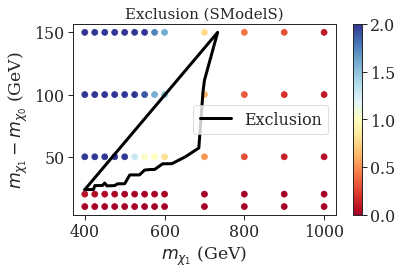

In [32]:
cp = plt.scatter(rValues[:,0],rValues[:,1],c=rValues[:,2],s=35,cmap=plt.cm.get_cmap('RdYlBu'), vmin=0., vmax=2.)
plt.plot(excCurve[:,0],excCurve[:,1],label='Exclusion',linewidth=3,color='black')
cb = plt.colorbar(cp)
# plt.yscale('log')
plt.xlabel(r'$m_{\chi_1}$ (GeV)')    
plt.ylabel(r'$m_{\chi_1}-m_{\chi_0}$ (GeV)')
# plt.xlim(100.,700.)
# plt.ylim(1e-10,1e-8)
plt.legend()
plt.tight_layout()
plt.title("Exclusion (SModelS)",fontsize=15)
plt.show()

In [33]:
rValues

array([[4.25000000e+02, 5.00000000e+01, 2.71038042e+00],
       [6.00000000e+02, 1.00000000e+02, 1.50435988e+00],
       [5.75000000e+02, 1.00000000e+01, 4.50834875e-05],
       [5.50000000e+02, 1.00000000e+01, 5.23563972e-05],
       [4.75000000e+02, 5.00000000e+01, 2.83142718e+00],
       [5.00000000e+02, 1.50000000e+02, 3.15277119e+00],
       [5.50000000e+02, 5.00000000e+01, 1.02786399e+00],
       [5.75000000e+02, 1.00000000e+02, 1.58195140e+00],
       [9.00000000e+02, 1.00000000e+01, 0.00000000e+00],
       [7.00000000e+02, 2.00000000e+01, 0.00000000e+00],
       [4.50000000e+02, 1.00000000e+01, 1.25676880e-04],
       [7.00000000e+02, 1.00000000e+01, 0.00000000e+00],
       [1.00000000e+03, 1.00000000e+01, 0.00000000e+00],
       [5.00000000e+02, 1.00000000e+01, 7.41218689e-05],
       [4.25000000e+02, 1.00000000e+01, 1.53332842e-04],
       [8.00000000e+02, 5.00000000e+01, 2.93576841e-01],
       [7.00000000e+02, 1.00000000e+02, 6.30636637e-01],
       [8.00000000e+02, 1.50000

In [19]:
rValues

array([[4.25000000e+02, 3.75000000e+02, 2.71038042e+00],
       [6.00000000e+02, 5.00000000e+02, 1.50435988e+00],
       [5.75000000e+02, 5.65000000e+02, 4.50834875e-05],
       [5.50000000e+02, 5.40000000e+02, 5.23563972e-05],
       [4.75000000e+02, 4.25000000e+02, 2.83142718e+00],
       [5.00000000e+02, 3.50000000e+02, 3.15277119e+00],
       [5.50000000e+02, 5.00000000e+02, 1.02786399e+00],
       [5.75000000e+02, 4.75000000e+02, 1.58195140e+00],
       [9.00000000e+02, 8.90000000e+02, 0.00000000e+00],
       [7.00000000e+02, 6.80000000e+02, 0.00000000e+00],
       [4.50000000e+02, 4.40000000e+02, 1.25676880e-04],
       [7.00000000e+02, 6.90000000e+02, 0.00000000e+00],
       [1.00000000e+03, 9.90000000e+02, 0.00000000e+00],
       [5.00000000e+02, 4.90000000e+02, 7.41218689e-05],
       [4.25000000e+02, 4.15000000e+02, 1.53332842e-04],
       [8.00000000e+02, 7.50000000e+02, 2.93576841e-01],
       [7.00000000e+02, 6.00000000e+02, 6.30636637e-01],
       [8.00000000e+02, 6.50000